In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

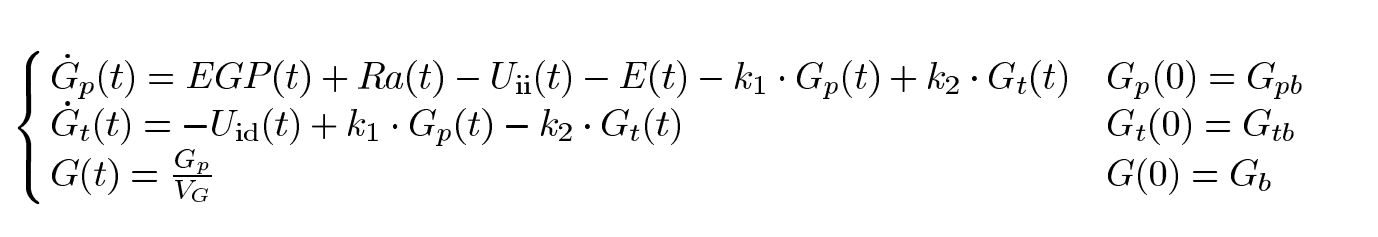

In [ ]:
# Gp: Glucose mass in plasma and rapidly equilibrating tissues (mg/kg)
# Gt: Glucose mass in slowly equilibrating tissues (mg/kg)
# G: Plasma glucose concentration (mg/dL)
# Vg: Volume of distribution of glucose (dL/kg)
# EGP: Endogenous glucose production (mg/kg/min)

G = Gp / Vg

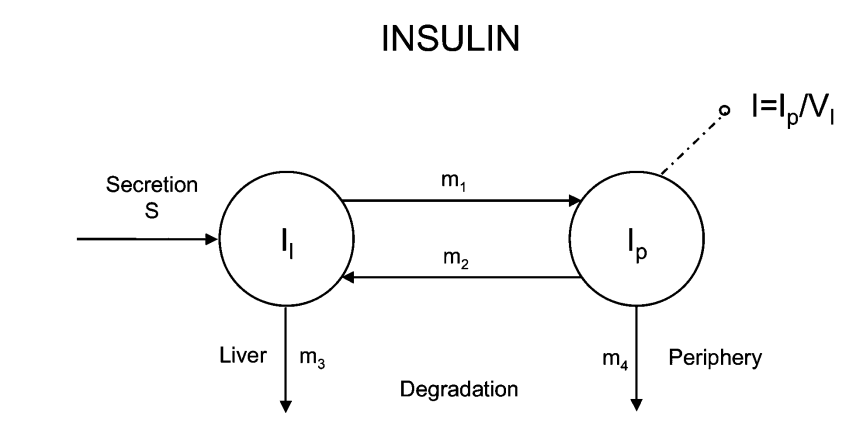
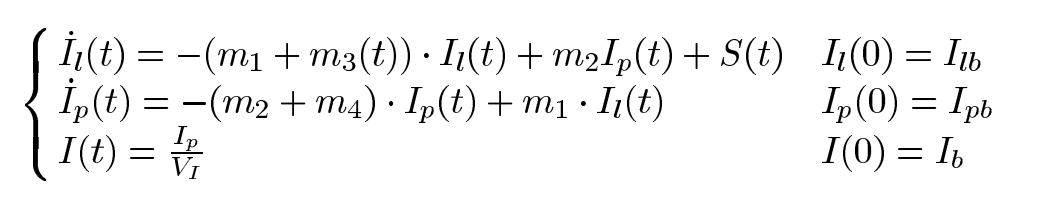


In [ ]:
'''
Insulin Subsystem

Ip: Insulin mass in plasma (pmol/kg)
Il: Insulin mass in liver (pmol/kg)
I: Plasma insulin concentration (pmol/L)
Suffix b: Basal state
S: Insulin secretion (pmol/kg/min)
VI: Distribution volume of insulin (L/kg)
m1, m2, m3: Rate parameters (per min)
HE: Hepatic extraction of insulin
The hepatic extraction ratio of insulin is defined as the quantity of insulin that leaves 
the liver irreversibly (i.e., the insulin that is taken up and metabolized by the liver), 
divided by the total quantity of insulin that leaves the liver (both the insulin that is metabolized 
and the insulin that simply passes through to the systemic circulation).

'''

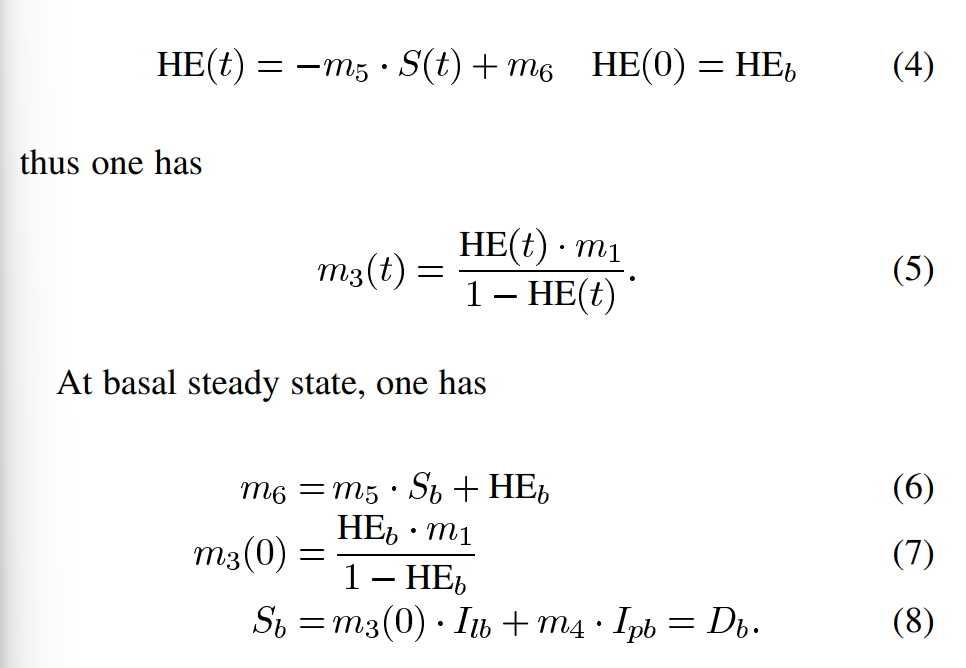

In [ ]:
VI = 0.05 # T2: 0.04 
m1 = 0.190  # T2: 0.379
m2 = 0.484  # T2: 0.673
m4 = 0.194 # T2: 0.269
m5 = 0.0304 # T2: 0.0526
m6 = 0.6471 # T2: 0.8118
HEb  = 0.6 # T2: 0.6

HE = -m5 * S + m6
m3 = (HE * m1) / (1 - HE)
Il = Il - (m1 + m3) * Il + m2 * Ip + S
Ip = Ip - (m2 + m4) * Ip + m1 * Il 
I = Ip / VI


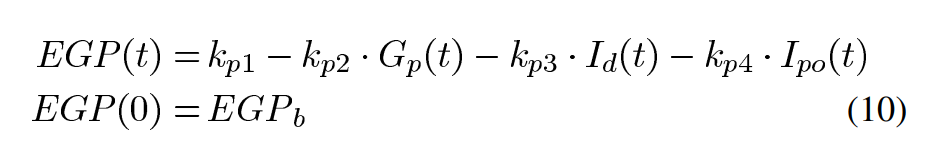

In [ ]:
'''
Endogenous Glucose Production (EGP)

EGP: Endogenous glucose production rate (mg/kg/min)
kp1: Extrapolated EGP at zero glucose and insulin (mg/kg/min)
kp2: Liver glucose effectiveness - the ability of liver to suppress its own production, independent of insulin (1/min)
kp3: Parameter governing amplitude of insulin action on the liver (mg/kg/min per pmol/L)
kp4: Parameter governing amplitude of portal insulin action on the liver (mg/kg/min per pmol/kg)
The distinction between kp3 and kp4 lies in the reference used for the concentration of insulin.
While kp3 considers the concentration of insulin in the bloodstream (pmol/L), 
kp4 takes into account the mass of insulin delivered to the liver through the portal vein (pmol/kg).
Id: Delayed insulin signal
Ipo: Amount of insulin in the portal vein (pmol/kg)

'''

kp1 = 2.70  # T2: 3.09
kp2 = 0.0021 # T2: 0.0007
kp3 = 0.009 # T2: 0.005
kp4 = 0.0618 # T2: 0.0786

EGP = kp1 - kp2 * Gp - kp3 * Id - kp4 * Ipo

if EGP < 0:
    EGP = 0 
    
    

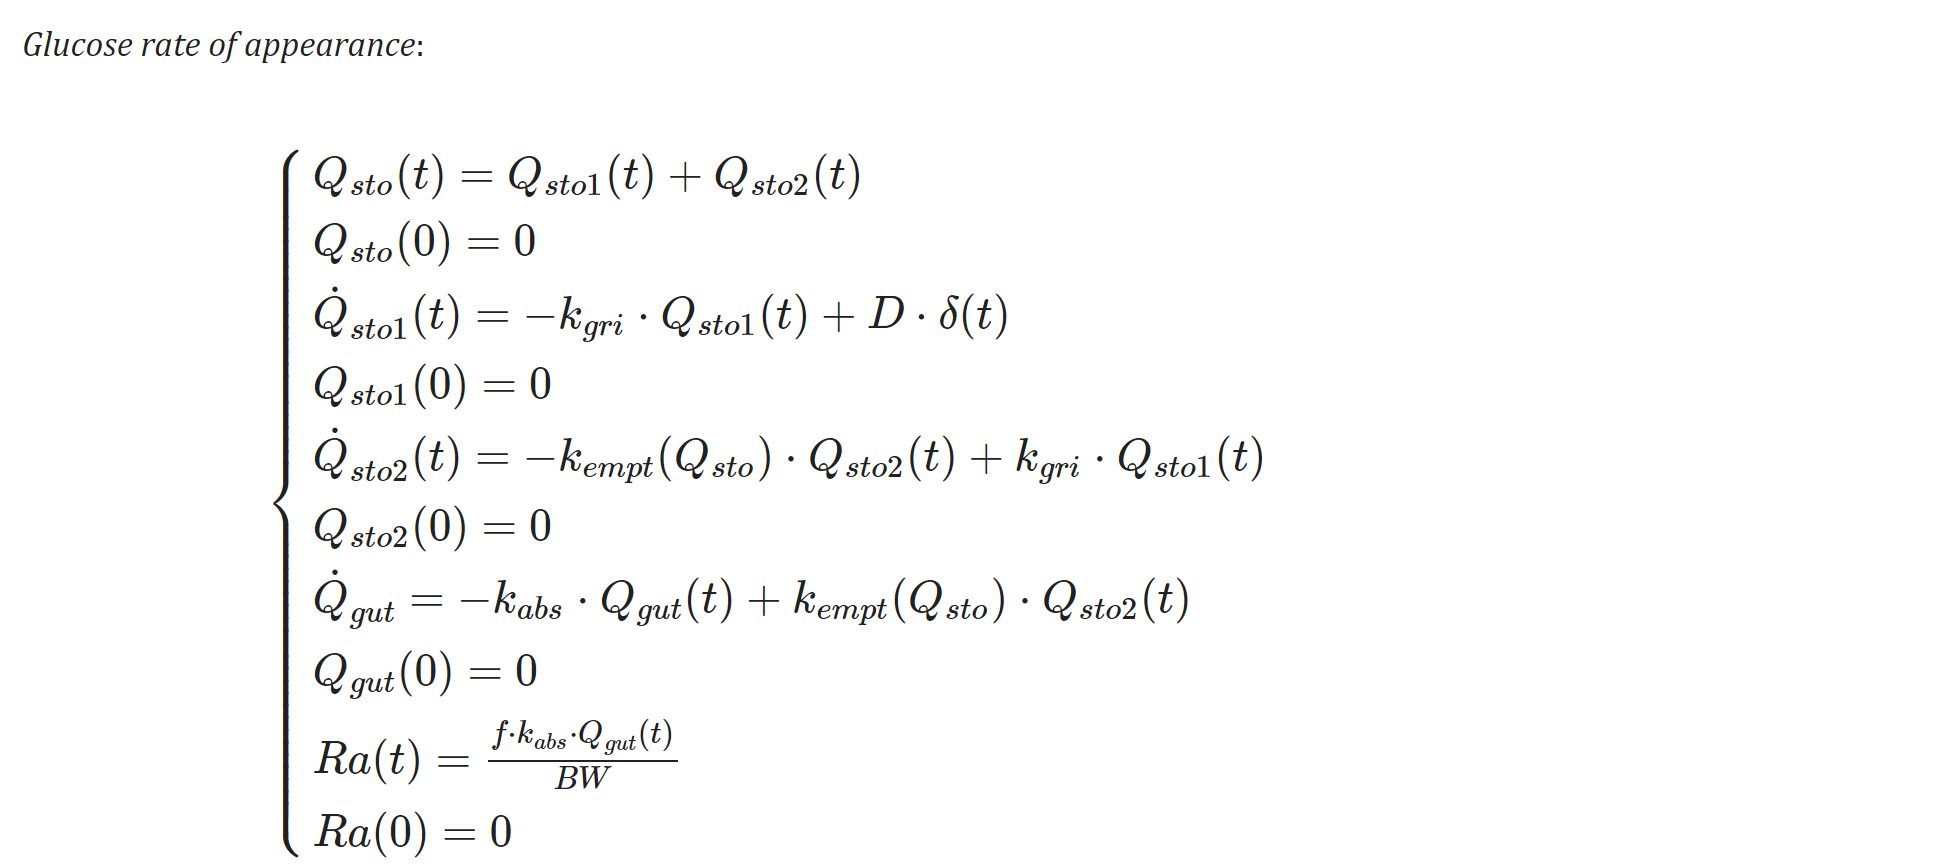

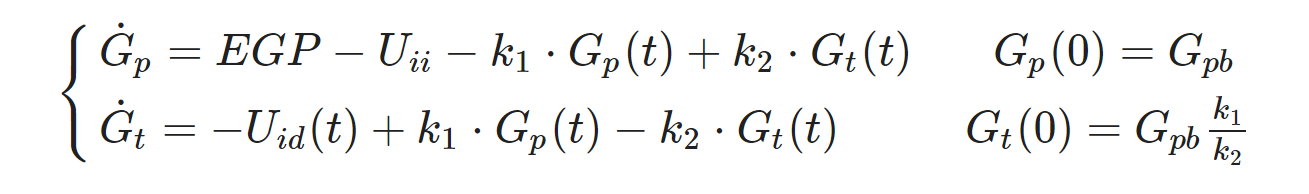